# NOTE: File sizes for the CSV files are incredibly large and unable to be pushed to repo.
# Use link below to download the files and place into folder containing the jupyter lab notebook
# https://drive.google.com/drive/folders/1YZleML3H3upn3kOD3Mp36WhDErgkZV_C?usp=drive_link

In [1]:
#Import Modules
import csv
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

In [2]:
#Read in CSV's and assign to variables
austin_crime = pd.read_csv("./crime-resources/austin_crime.csv",low_memory=False)
chicago_crime = pd.read_csv("./crime-resources/chicago_crime.csv",low_memory=False)
denver_crime = pd.read_csv("./crime-resources/denver_crime.csv",low_memory=False,encoding = 'unicode_escape')
memphis_crime = pd.read_csv("./crime-resources/memphis_crime.csv",low_memory=False)
ny_crime_historic = pd.read_csv("./crime-resources/ny_crime_historic.csv",low_memory=False)
sf_crime = pd.read_csv("./crime-resources/sf_crime.csv",low_memory=False)

#Declaring population values for each city from Cory
austin_2020_pop = 1654166
austin_2021_pop = 1640207

chicago_2020_pop = 8609757
chicago_2021_pop = 8728576

denver_2020_pop = 2691678
denver_2021_pop = 2687114

memphis_2020_pop = 1078205
memphis_2021_pop = 1069048

ny_2020_pop = 18714184
ny_2021_pop = 19441575

sf_2020_pop = 3532003
sf_2021_pop = 3540396

In [3]:
austin_crime.columns

Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
#Gathering needed Column information and setting to DataFrame
austin_df = austin_crime.drop(columns=['Incident Number', 'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
                                       'Occurred Time', 'Report Date Time', 'Report Date', 'Report Time', 'Location Type',
                                       'Address', 'Zip Code', 'Council District', 'APD Sector', 'APD District','PRA', 'Census Tract',
                                       'Clearance Status', 'Clearance Date', 'UCR Category','Category Description', 'X-coordinate', 
                                       'Y-coordinate', 'Latitude', 'Longitude', 'Location'])
austin_df.head()

,Highest Offense Description,Occurred Date
0,FAMILY DISTURBANCE,02/16/2006
1,FAMILY DISTURBANCE,11/26/2017
2,TAMPERING WITH ID NUMBER,09/14/2004
3,FAMILY DISTURBANCE,04/06/2006
4,SEXUAL ASSAULT OF CHILD/OBJECT,01/01/2009


In [5]:
chicago_crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
#Gathering needed Column information and setting to DataFrame
chicago_df = chicago_crime.drop(columns=['ID', 'Case Number', 'Block', 'IUCR',
                                         'Location Description', 'Arrest', 'Domestic', 'Beat',
                                         'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
                                         'Y Coordinate', 'Updated On', 'Latitude', 'Longitude','Location', 'Description', 'Date'])
chicago_df.head()

,Primary Type,Year
0,THEFT,2018
1,DECEPTIVE PRACTICE,2016
2,SEX OFFENSE,2017
3,BATTERY,2001
4,DECEPTIVE PRACTICE,2015


In [7]:
denver_crime.columns

Index(['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'first_occurrence_date',
       'last_occurrence_date', 'reported_date', 'incident_address', 'geo_x',
       'geo_y', 'geo_lon', 'geo_lat', 'district_id', 'precinct_id',
       'neighborhood_id', 'is_crime', 'is_traffic', 'victim_count'],
      dtype='object')

In [8]:
#Gathering needed Column information and setting to DataFrame
denver_df = denver_crime.drop(columns=['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
                                       'last_occurrence_date', 'reported_date','incident_address', 'geo_x','geo_y',
                                       'geo_lon', 'geo_lat','district_id', 'precinct_id','neighborhood_id', 'is_crime', 'is_traffic', 'victim_count', 'offense_category_id'])
denver_df.head()

,offense_type_id,first_occurrence_date
0,criminal-mischief-other,2/10/2022 2:50:00 AM
1,criminal-mischief-other,7/7/2021 9:02:00 PM
2,criminal-mischief-other,10/29/2020 1:30:00 AM
3,criminal-mischief-other,9/6/2018 5:00:00 PM
4,criminal-mischief-other,5/8/2020 5:00:00 AM


In [9]:
memphis_crime.columns

Index(['crime_id', 'offense_date', 'agency_crimetype_id', 'city', 'state',
       'coord1', 'coord2', '100 Block Address', 'Location', 'Category',
       'Shelby County Zip Codes', 'Memphis 3.0 Planning Districts',
       'City Council Districts', 'City Council Super Districts',
       'Community Neighborhoods Boundaries',
       'Community Neighborhoods Boundaries 1',
       'Community Neighborhoods Boundaries 2',
       'Memphis Police Department Wards',
       'Memphis Police Department Districts',
       'Memphis Police Department Stations',
       'Mid-South Fairgrounds Half Mile Buffer',
       'Crosstown Concourse Half Mile Buffer',
       'Council District Boundaries Dec 2022',
       'Council Super District Boundaries Dec 2022'],
      dtype='object')

In [10]:
#Gathering needed Column information and setting to DataFrame
memphis_df = memphis_crime.drop(columns=['crime_id', 'city', 'state', 'coord1', 'coord2', '100 Block Address', 'Location', 'agency_crimetype_id', 
                                         'Shelby County Zip Codes', 'Memphis 3.0 Planning Districts',
                                         'City Council Districts', 'City Council Super Districts',
                                         'Community Neighborhoods Boundaries','Community Neighborhoods Boundaries 1','Community Neighborhoods Boundaries 2',
                                         'Memphis Police Department Wards','Memphis Police Department Districts',
                                         'Memphis Police Department Stations','Mid-South Fairgrounds Half Mile Buffer',
                                         'Crosstown Concourse Half Mile Buffer','Council District Boundaries Dec 2022','Council Super District Boundaries Dec 2022'])
memphis_df.head()

,offense_date,Category
0,09/13/2013 09:00:00 PM,Theft
1,01/04/2013 06:00:00 PM,Assault
2,01/04/2006 05:45:00 AM,Assault
3,01/07/2006 08:00:00 AM,Theft of Vehicle
4,01/27/2013 01:30:00 PM,Assault


In [11]:
ny_crime_historic.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [12]:
#Gathering needed Column information and setting to DataFrame
ny_df = ny_crime_historic.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD',
                                        'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
                                        'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
                                        'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat', 'OFNS_DESC'])
ny_df

,ARREST_DATE,PD_DESC
0,11/22/2021,NaN
1,12/04/2021,RAPE 3
2,11/09/2021,"CHILD, ENDANGERING WELFARE"
3,06/18/2007,"CONTROLLED SUBSTANCE, POSSESSION 7"
4,01/26/2019,SEXUAL ABUSE
...,...,...
5498645,12/13/2022,"TRAFFIC,UNCLASSIFIED INFRACTIO"
5498646,12/16/2022,CRIMINAL CONTEMPT 1
5498647,12/20/2022,"GAMBLING, DEVICE, POSSESSION"
5498648,12/13/2022,ASSAULT 3


In [13]:
sf_crime.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District',
       'Supervisor District 2012', 'Latitude', 'Longitude', 'Point',
       'Neighborhoods', 'ESNCAG - Boundary File',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Civic Center Harm Reduction Project Boundary',
       'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas',
       'Current Supervisor Districts', 'Current Police Districts'],
      dtype='object')

In [14]:
#Gathering needed Column information and setting to DataFrame
sf_df = sf_crime.drop(columns=['Incident Datetime', 'Incident Time',
                                'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
                                'Incident Number', 'CAD Number', 'Report Type Code',
                                'Report Type Description', 'Filed Online', 'Incident Code',
                                'Incident Subcategory', 'Incident Description',
                                'Resolution', 'Intersection', 'CNN', 'Police District',
                                'Analysis Neighborhood', 'Supervisor District',
                                'Supervisor District 2012', 'Latitude', 'Longitude', 'Point',
                                'Neighborhoods', 'ESNCAG - Boundary File',
                                'Central Market/Tenderloin Boundary Polygon - Updated',
                                'Civic Center Harm Reduction Project Boundary',
                                'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas',
                                'Current Supervisor Districts', 'Current Police Districts', 'Incident Date'])
sf_df.head()

,Incident Year,Incident Category
0,2023,Recovered Vehicle
1,2023,Larceny Theft
2,2023,Recovered Vehicle
3,2023,Recovered Vehicle
4,2023,Recovered Vehicle


In [15]:
#Renaming Columns to be consistent
austin_df = austin_df.rename(columns={"Highest Offense Description":"Crime", "Occurred Date":"Date"})

In [16]:
chicago_df=chicago_df.rename(columns={"Year":"Year", "Primary Type":"Crime"})

In [17]:
denver_df=denver_df.rename(columns={"offense_type_id":"Crime", "first_occurrence_date":"Date"})

In [18]:
memphis_df=memphis_df.rename(columns={"offense_date":"Date", "Category":"Crime"})

In [19]:
ny_df=ny_df.rename(columns={"ARREST_DATE":"Date", "PD_DESC":"Crime"})

In [20]:
sf_df=sf_df.rename(columns={"Incident Year":"Year", "Incident Category":"Crime"})

In [21]:
#Dropping NaN values, converting (null) to NaN to drop as well
austin_df['Crime'].replace('(null)', np.nan, inplace=True)
austin_df.dropna(inplace=True)

In [22]:
chicago_df['Crime'].replace('(null)', np.nan, inplace=True)
chicago_df.dropna(inplace=True)

In [23]:
denver_df['Crime'].replace('(null)', np.nan, inplace=True)
denver_df.dropna(inplace=True)

In [24]:
memphis_df['Crime'].replace('(null)', np.nan, inplace=True)
memphis_df.dropna(inplace=True)

In [25]:
ny_df['Crime'].replace('(null)', np.nan, inplace=True)
ny_df.dropna(inplace=True)

In [26]:
sf_df['Crime'].replace('(null)', np.nan, inplace=True)
sf_df.dropna(inplace=True)

In [27]:
#Getting the information from 2020-2022 for each city
years_needed = [2020, 2021, 2022]

#Austin
austin_df['Date'] = pd.to_datetime(austin_df['Date'])
austin_df['Year'] = austin_df['Date'].dt.year
austin_year_df = dict(tuple(austin_df.groupby('Year')))
austin_crime_2020 = austin_year_df[2020]
austin_crime_2021 = austin_year_df[2021]
austin_crime_2022 = austin_year_df[2022]

#Chicago
chicago_df = chicago_df[chicago_df['Year'].isin(years_needed)]
chicago_year_df = dict(tuple(chicago_df.groupby('Year')))
chicago_crime_2020 = chicago_year_df[2020]
chicago_crime_2021 = chicago_year_df[2021]
chicago_crime_2022 = chicago_year_df[2022]

#Denver
denver_df['Date'] = pd.to_datetime(denver_df['Date'])
denver_df['Year'] = denver_df['Date'].dt.year
denver_year_df = dict(tuple(denver_df.groupby('Year')))
denver_crime_2020 = denver_year_df[2020]
denver_crime_2021 = denver_year_df[2021]
denver_crime_2022 = denver_year_df[2022]

#Memphis
memphis_df['Date'] = pd.to_datetime(memphis_df['Date'])
memphis_df['Year'] = memphis_df['Date'].dt.year
memphis_year_df = dict(tuple(memphis_df.groupby('Year')))
memphis_crime_2020 = memphis_year_df[2020]
memphis_crime_2021 = memphis_year_df[2021]
memphis_crime_2022 = memphis_year_df[2022]

#New York City
ny_df['Date'] = pd.to_datetime(ny_df['Date'])
ny_df['Year'] = ny_df['Date'].dt.year
ny_year_df = dict(tuple(ny_df.groupby('Year')))
ny_crime_2020 = ny_year_df[2020]
ny_crime_2021 = ny_year_df[2021]
ny_crime_2022 = ny_year_df[2022]

#San Francisco
sf_df = sf_df[sf_df['Year'].isin(years_needed)]
sf_year_df = dict(tuple(sf_df.groupby('Year')))
sf_crime_2020 = sf_year_df[2020]
sf_crime_2021 = sf_year_df[2021]
sf_crime_2022 = sf_year_df[2022]

In [28]:
#Gathering total number of crimes in each city for 2020-2022
crime_data = {
    'Austin': {
        2020: austin_crime_2020,
        2021: austin_crime_2021,
        2022: austin_crime_2022
    },
    'Chicago': {
        2020: chicago_crime_2020,
        2021: chicago_crime_2021,
        2022: chicago_crime_2022
    },
    'Denver': {
        2020: denver_crime_2020,
        2021: denver_crime_2021,
        2022: denver_crime_2022
    },
    'Memphis': {
        2020: memphis_crime_2020,
        2021: memphis_crime_2021,
        2022: memphis_crime_2022
    },
    'New York City': {
        2020: ny_crime_2020,
        2021: ny_crime_2021,
        2022: ny_crime_2022
    },
    'San Francisco': {
        2020: sf_crime_2020,
        2021: sf_crime_2021,
        2022: sf_crime_2022
    }
    
}

crime_totals = {}

for city, years_data in crime_data.items():
    total_crimes_by_year = {}
    for year, crime_df in years_data.items():
        total_crimes_by_year[year] = len(crime_df)
    crime_totals[city] = total_crimes_by_year

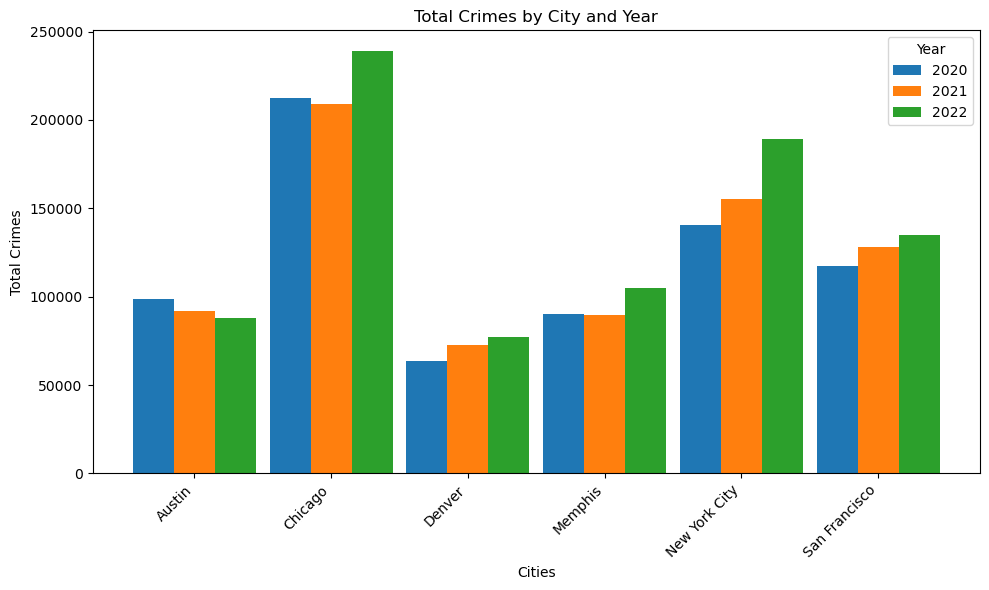

In [29]:
#Creating bar chart for city comparison
cities = list(crime_totals.keys())
years = list(crime_totals[cities[0]].keys())

x_pos = range(len(cities))

bar_width = 0.3
plt.figure(figsize=(10, 6))

for i, year in enumerate(years):
    total_crimes = [crime_totals[city][year] for city in cities]
    x_pos_shifted = [pos + i * bar_width for pos in x_pos]
    plt.bar(x_pos_shifted, total_crimes, width=bar_width, label=str(year))


plt.xticks([pos + bar_width for pos in x_pos], cities, rotation=45, ha='right')
plt.xlabel('Cities')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by City and Year')

plt.legend(title='Year', loc='best')

y_ticks = range(0, max([max(crime_totals[city].values()) for city in cities]) + 50000, 50000)
plt.yticks(y_ticks)

plt.tight_layout()
plt.savefig('./output_data/totalcrimebarchart.png')
plt.show()

In [30]:
#Calculating total crime rates for each city for years available

austin_2020_crime_rate = len(austin_crime_2020) / austin_2020_pop * 100000
austin_2021_crime_rate = len(austin_crime_2021) / austin_2021_pop * 100000

chicago_2020_crime_rate = len(chicago_crime_2020) / chicago_2020_pop * 100000
chicago_2021_crime_rate = len(chicago_crime_2021) / chicago_2021_pop * 100000

denver_2020_crime_rate = len(denver_crime_2020) / denver_2020_pop * 100000
denver_2021_crime_rate = len(denver_crime_2021) / denver_2021_pop * 100000

memphis_2020_crime_rate = len(memphis_crime_2020) / memphis_2020_pop * 100000
memphis_2021_crime_rate = len(memphis_crime_2021) / memphis_2021_pop * 100000

ny_2020_crime_rate = len(ny_crime_2020) / ny_2020_pop * 100000
ny_2021_crime_rate = len(ny_crime_2021) / ny_2021_pop * 100000

sf_2020_crime_rate = len(sf_crime_2020) / sf_2020_pop * 100000
sf_2021_crime_rate = len(sf_crime_2021) / sf_2021_pop * 100000

In [31]:
#Rounding values

austin_2020_crime_rate = round(austin_2020_crime_rate, 2)
austin_2021_crime_rate = round(austin_2021_crime_rate, 2)

chicago_2020_crime_rate = round(chicago_2020_crime_rate, 2)
chicago_2021_crime_rate = round(chicago_2021_crime_rate, 2)

denver_2020_crime_rate = round(denver_2020_crime_rate, 2)
denver_2021_crime_rate = round(denver_2021_crime_rate, 2)

memphis_2020_crime_rate = round(memphis_2020_crime_rate, 2)
memphis_2021_crime_rate = round(memphis_2021_crime_rate, 2)

ny_2020_crime_rate = round(ny_2020_crime_rate, 2)
ny_2021_crime_rate = round(ny_2021_crime_rate, 2)

sf_2020_crime_rate = round(sf_2020_crime_rate, 2)
sf_2021_crime_rate = round(sf_2021_crime_rate, 2)

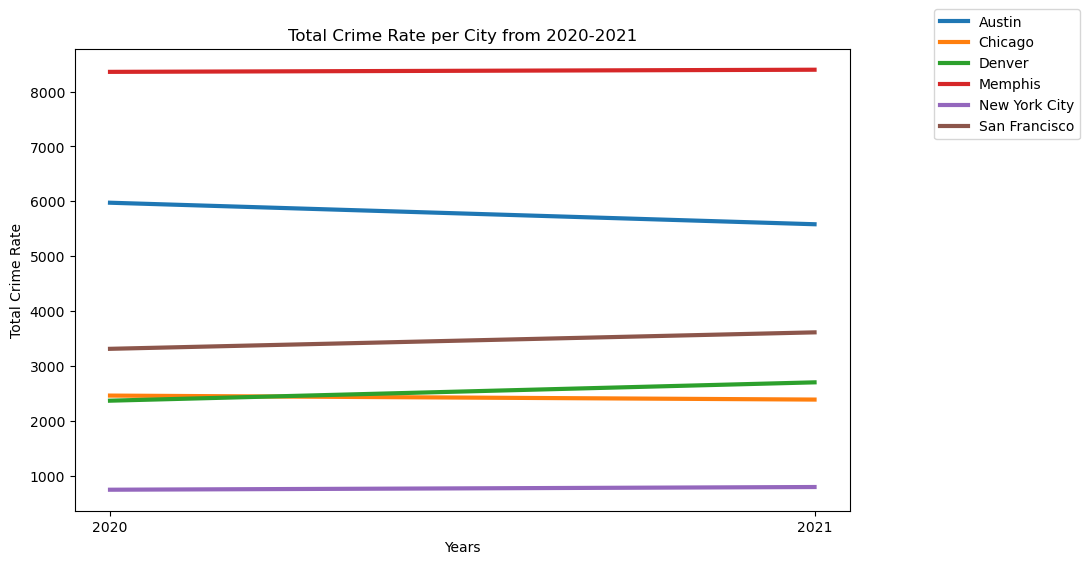

In [38]:
# Line plots to show crime rates for each city for 2020-2021
x_axis = ([2020, 2021])
y1= ([austin_2020_crime_rate, austin_2021_crime_rate])
y2= ([chicago_2020_crime_rate, chicago_2021_crime_rate])
y3= ([denver_2020_crime_rate, denver_2021_crime_rate])
y4= ([memphis_2020_crime_rate, memphis_2021_crime_rate])
y5= ([ny_2020_crime_rate, ny_2021_crime_rate])
y6= ([sf_2020_crime_rate, sf_2021_crime_rate])
plt.figure(figsize=(10,6))
plt.plot(x_axis, y1, linewidth=3, label='Austin')
plt.plot(x_axis, y2, linewidth=3, label='Chicago')
plt.plot(x_axis, y3, linewidth=3, label='Denver')
plt.plot(x_axis, y4, linewidth=3, label='Memphis')
plt.plot(x_axis, y5, linewidth=3, label='New York City')
plt.plot(x_axis, y6, linewidth=3, label='San Francisco')
plt.xlabel("Years")
plt.xticks(np.arange(2020, 2022, 1.0))
plt.ylabel("Total Crime Rate")
plt.title("Total Crime Rate per City from 2020-2021")
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.savefig('./output_data/totalcrimelinechart.png')